#  TASK 3

## Classification of images - SVM

In [1]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn import svm

In [2]:
dataset_path='C:\\Users\\Shruti\\Desktop\\Prodigy Infotech\\cats n dogs\\test_set'

In [3]:
images=[]
labels=[]
for category in ['cats','dogs']:
    label=0 if category == 'cats' else 1
    category_path = os.path.join(dataset_path,category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            labels.append(label)

In [4]:
image_size = 64
processed_images = []

for img in images:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img ,(image_size, image_size))
    processed_images.append(resized_img)
    
X = np.array(processed_images)
y = np.array(labels)

X = X.reshape(len(X), -1)
X =X / 255.0

In [5]:
X_train, X_test ,y_train , y_test =train_test_split(X , y , test_size=0.2 , random_state =42)

In [6]:
model = svm.SVC(kernel='linear')
model.fit(X_train , y_train)

SVC(kernel='linear')

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100 :.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 52.75%
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       199
           1       0.53      0.53      0.53       201

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



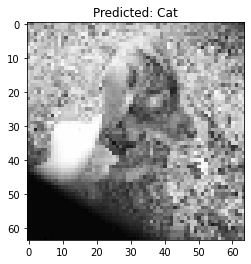

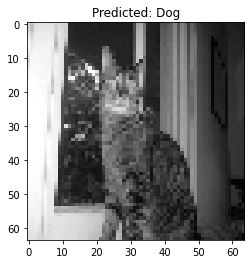

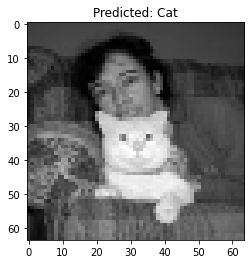

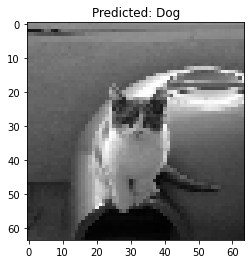

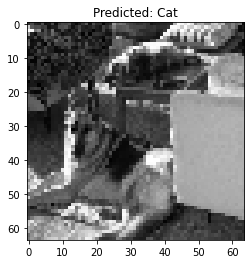

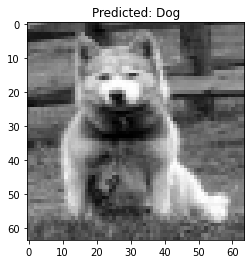

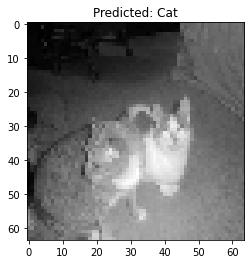

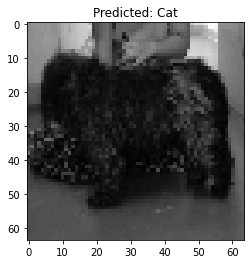

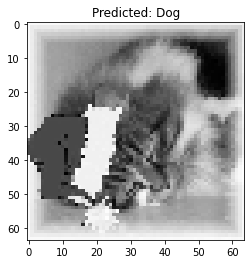

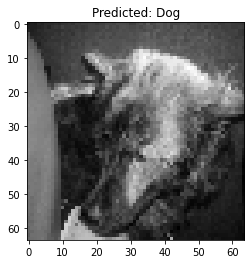

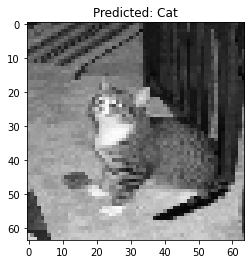

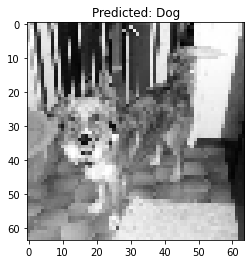

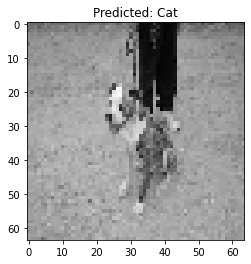

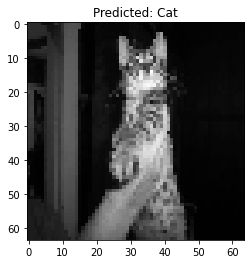

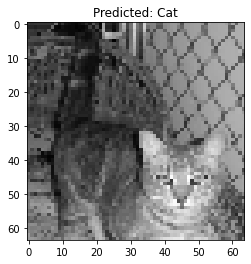

In [10]:
for i in range(15):
    plt.imshow(X_test[i].reshape(image_size,image_size),cmap='gray')
    plt.title(f'Predicted: {"Dog" if y_pred[i] else "Cat"}')
    plt.show()